<a href="https://colab.research.google.com/github/mochradja/DataScience/blob/main/Automotive_Price_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/yanwarsolah/9186a11dd25336e327aab5bf8bd47ede/raw/c3df8e086d6248c097f8f601d3bc5cd89c554397/automotive.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [ ]:
#pengecekan data
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [ ]:
df['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [ ]:
not_numeric = df['price'].str.isnumeric() == False
df['price'].loc[not_numeric]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [ ]:
price = df['price'].loc[df['price'] != '?']
price_mean = price.astype(int).mean()

df['price'] = df['price'].replace('?', price_mean).astype(int)
df['price']

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int64

In [ ]:
df.info()

In [ ]:
df['horsepower'].str.isnumeric().value_counts()

True     203
False      2
Name: horsepower, dtype: int64

In [ ]:
not_numeric = df['horsepower'].str.isnumeric() == False
df['horsepower'].loc[not_numeric]

130    ?
131    ?
Name: horsepower, dtype: object

In [ ]:
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
horse_mean = horsepower.astype(int).mean()

df['horsepower'] = df['horsepower'].replace('?', horse_mean).astype(int)
df['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: int64

In [ ]:
df.info()

In [ ]:
not_numeric = df['normalized-losses'].str.isnumeric() == False
df['normalized-losses'].loc[not_numeric]

0      ?
1      ?
2      ?
5      ?
7      ?
9      ?
14     ?
15     ?
16     ?
17     ?
43     ?
44     ?
45     ?
46     ?
48     ?
49     ?
63     ?
66     ?
71     ?
73     ?
74     ?
75     ?
82     ?
83     ?
84     ?
109    ?
110    ?
113    ?
114    ?
124    ?
126    ?
127    ?
128    ?
129    ?
130    ?
131    ?
181    ?
189    ?
191    ?
192    ?
193    ?
Name: normalized-losses, dtype: object

In [ ]:
normalized = df['normalized-losses'].loc[df['normalized-losses'] != '?']
normalized_mean = normalized.astype(int).mean()

df['normalized-losses'] = df['normalized-losses'].replace('?', normalized_mean).astype(int)
df['normalized-losses']

# insight 1

Measurement central tendency

In [ ]:
df['height'].mean(), df['height'].median(), df['height'].mode()

(53.724878048780525, 54.1, 0    50.8
 dtype: float64)

# insight 2

Melihat bagaimana keadaan rentang harga jual

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


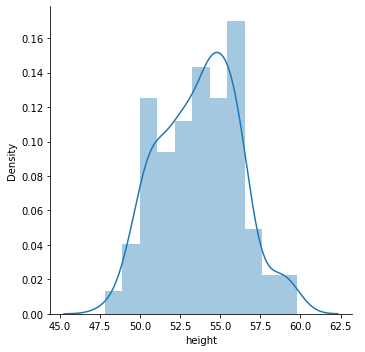

In [ ]:
sns.FacetGrid(df, size = 5).map (sns.distplot, 'height').add_legend()

# Insight 3

Melihat bagaimana keadaan rentang harga maksimal penjualan mobil yang ada di pasaran

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


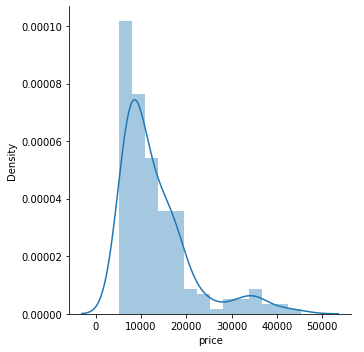

In [ ]:
sns.FacetGrid(df, size = 5).map (sns.distplot, 'price').add_legend()

# Insight 4

Melihat bagaimana pengaruh kekuatan mesin dengan harga mobil

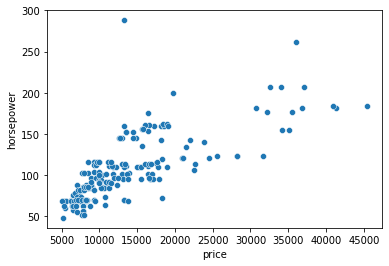

In [ ]:
sns.scatterplot(data = df, x = 'price', y = 'horsepower')
plt.show()

# Insight 5

Melihat bagaimana perbandingan harga mobil dari lokasi mesinnya

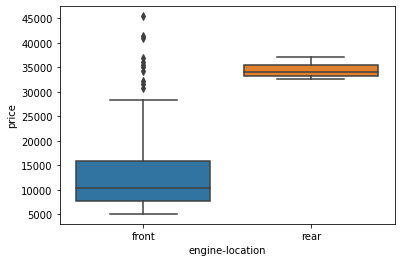

In [ ]:
sns.boxplot(x = 'engine-location', y = 'price', data = df)
plt.show()

# Insight 6

Melihat bagaimana perbandingan harga mobil dari sistem penggerak roda

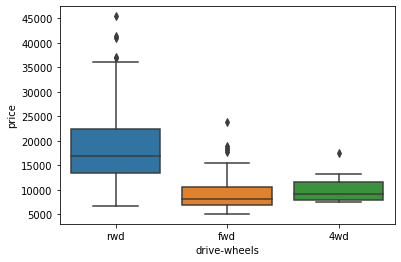

In [ ]:
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)
plt.show()

# Insight 7

Melihat perbandingan lebih dari 2 varian dengan multivariat

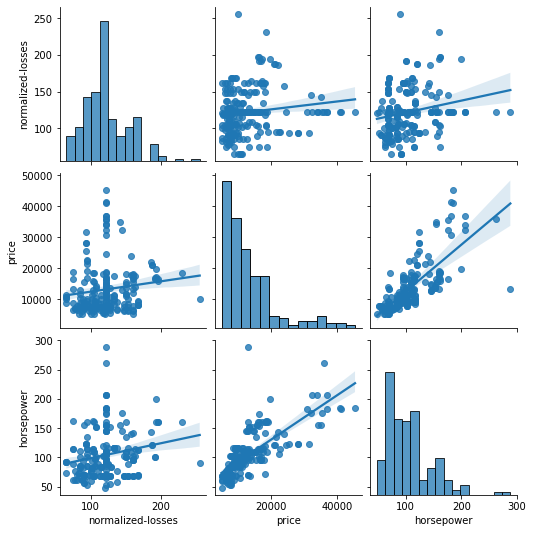

In [ ]:
sns.pairplot(df, vars = ['normalized-losses', 'price', 'horsepower'], kind = 'reg')
plt.show()

In [ ]:
df[['price', 'horsepower']].corr()

,price,horsepower
price,1.000000,0.757946
horsepower,0.757946,1.000000


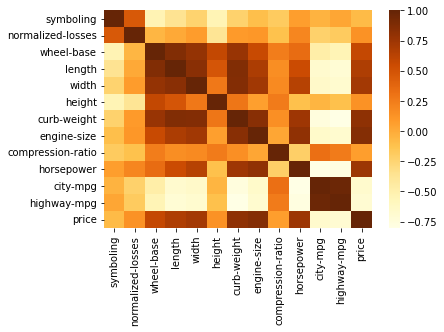

In [ ]:
# correlation = df.corr()
# sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap='Y1OrBr')

correlation = df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap='YlOrBr')